In [251]:
import pandas
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt

pandas.options.display.float_format = '{:.2f}'.format

os.chdir("/Users/pbenson/Documents/IOH project/")

txn_dirPath = 'Data/'


txn_converter = {'TXN - Transaction Type': str,
                 'TXN - Transaction Date': str,
                 'TXN - Item ID': str,
                 'TXN - Qty': float,
                 'TXN - Total Cost': float}

transaction_col = ['TXN - Transaction Type', 'TXN - Transaction Date',
                   'TXN - Item ID', 'TXN - Qty', 'TXN - Total Cost', 'TXN - Adjust Type']

out_types = ('051', '054', '030', '031')
positive_types = ('041', '022', '024', '050', '010', '020')
drop_types = ('060', '053', '052', '012', '001', '042')

#date = '2021-12-31 23:59:59'

def get_lof_csv(directory):
    lof = []
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            lof.append(directory + file)
            print("Read file {}".format(file))
    return lof

def read_csv_to_df(lof, converter):
    print("Converting to pandas dataframe")

    dataframe = pandas.DataFrame()

    # More efficient way to do this: pd.concat
    next_txns = []
    for f in lof:
        next_txn = pandas.read_csv(f, converters=converter, encoding= 'unicode_escape')
        next_txns.append(next_txn)
        #dataframe = dataframe.append(next_txn, ignore_index=True)
        print(f + ' is appened')
    dataframe = pandas.concat(next_txns, ignore_index=True)
    return dataframe

def handle_I_D(txn_df):
    txn_df['TXN - Qty'] = np.where(txn_df['TXN - Adjust Type'] == 'D', 0 - abs(txn_df['TXN - Qty']),
                                   txn_df['TXN - Qty'])
    txn_df['TXN - Qty'] = np.where(txn_df['TXN - Adjust Type'] == 'M', 0 - abs(txn_df['TXN - Qty']),
                                   txn_df['TXN - Qty'])
    txn_df['TXN - Total Cost'] = np.where(txn_df['TXN - Adjust Type'] == 'D', 0 - abs(txn_df['TXN - Total Cost']),
                                          txn_df['TXN - Total Cost'])
    txn_df['TXN - Total Cost'] = np.where(txn_df['TXN - Adjust Type'] == 'M', 0 - abs(txn_df['TXN - Total Cost']),
                                          txn_df['TXN - Total Cost'])
    
    
    for t_type in out_types: 
        txn_df.loc[txn_df['TXN - Transaction Type'] == t_type, 'TXN - Qty'] = 0 - abs(txn_df['TXN - Qty'])
        txn_df.loc[txn_df['TXN - Transaction Type'] == t_type, 'TXN - Total Cost'] = 0 - abs(txn_df['TXN - Total Cost'])
    
    # Trust Anni's Code – it has already been validated.

    # We don't want to drop columns.
    #txn_df = txn_df.drop(columns=['TXN - Transaction Type', 'TXN - Adjust Type'])
    return txn_df

def drop_unused(txn_df):
    for t_type in drop_types:
        txn_df.loc[txn_df['TXN - Transaction Type'] == t_type, 'TXN - Qty'] = 0 
        txn_df.loc[txn_df['TXN - Transaction Type'] == t_type, 'TXN - Total Cost'] = 0
    
    return txn_df

def read_txn_by_date(txn_df, date):
    txn_df = txn_df.loc[txn_df['TXN - Transaction Date'] < date]
    #txn_df = txn_df.drop(columns=['TXN - Transaction Date'])
    # We don't want to drop the Transaction Date column.
    return txn_df

def sum_by_date(txn_df, date):
    txn_df = txn_df.loc[txn_df['TXN - Transaction Date'] < date]
    #txn_df = txn_df.drop(columns=['TXN - Transaction Date'])
    # We don't want to drop the Transaction Date column.
    return txn_df["TXN - Total Cost"].sum()

def sku_running_total(txn_df: pandas.DataFrame, item_sku: str) -> float:
    return txn_df.loc[txn_df['TXN - Item ID'] == item_sku, ('TXN - Qty', 'TXN - Transaction Type')]

def thousand_places(number):
    # Simple function for formatting large number outputs
    return "{:,}".format(number)

In [252]:
txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)

Read file PL_INVENTORY_TRANSACTIONS_2009_Q4x.csv
Read file PL_INVENTORY_TRANSACTIONS_2019_Q4x.csv
Read file PL_INVENTORY_TRANSACTIONS_2020_Q1x.csv
Read file PL_INVENTORY_TRANSACTIONS_2006_Q1x.csv
Read file PL_INVENTORY_TRANSACTIONS_2016_Q1x.csv
Read file PL_INVENTORY_TRANSACTIONS_2012_Q3x.csv
Read file PL_INVENTORY_TRANSACTIONS_2013_Q2x.csv
Read file PL_INVENTORY_TRANSACTIONS_2010_Q4x.csv
Read file PL_INVENTORY_TRANSACTIONS_2017_Q1x.csv
Read file PL_INVENTORY_TRANSACTIONS_2007_Q1x.csv
Read file PL_INVENTORY_TRANSACTIONS_2013_Q3x.csv
Read file PL_INVENTORY_TRANSACTIONS_2012_Q2x.csv
Read file PL_INVENTORY_TRANSACTIONS_2011_Q4x.csv
Read file PL_INVENTORY_TRANSACTIONS_2018_Q4x.csv
Read file PL_INVENTORY_TRANSACTIONS_2008_Q4x.csv
Read file PL_INVENTORY_TRANSACTIONS_2011_Q3x.csv
Read file PL_INVENTORY_TRANSACTIONS_2005_Q1x.csv
Read file PL_INVENTORY_TRANSACTIONS_2015_Q1x.csv
Read file PL_INVENTORY_TRANSACTIONS_2013_Q4x.csv
Read file PL_INVENTORY_TRANSACTIONS_2010_Q2x.csv
Read file PL_INVENTO

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (33,40,50,54,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2009_Q4x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,33,36,40,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2019_Q4x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,33,36,40,54,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2020_Q1x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (44,50) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2006_Q1x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (3,6,19,20,33,56,57,58,67,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2016_Q1x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,44) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2012_Q3x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2013_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (40,44,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2010_Q4x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2017_Q1x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (3,17,18,19,33,40,44,47,48,50,58,59,67,70,71,73,75) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2007_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2013_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,44,50) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2012_Q2x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2011_Q4x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2018_Q4x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2008_Q4x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2011_Q3x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2005_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2015_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2013_Q4x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (33,50,54) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2010_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,33,40,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2021_Q1.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,36,40,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2021_Q3.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2008_Q3x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2018_Q3x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2019_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (33,44,54) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2009_Q2x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2021_Q2.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2019_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (33,40,54,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2009_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (66) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2008_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (3,6,19,20,36,40,44,47,48,54,56,57,58,59,66,67,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2018_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (3,19,33,44,54,58,67) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2010_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,40,44,50,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2014_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2012_Q4x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2021_Q4.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (33,44) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2011_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,40,44,59,66) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2017_Q4x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (40,44,50,59,66) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2007_Q4x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2014_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (3,6,17,18,19,20,27,33,40,44,47,48,56,57,58,59,67,69,70,73,75) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2004_1Hx.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,33,44,54) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2015_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (40,44,50,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2005_Q3x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2011_Q1x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,33,36,40,59,66) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2018_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2008_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2009_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2019_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2020_Q4x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (3,6,19,20,27,33,40,44,47,48,50,56,57,58,59,67,69,70,71,73,75) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2006_Q4x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,40,44,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2016_Q4x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2015_Q2x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2005_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (3,6,19,20,33,40,44,56,57,58,59,67,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2004_Q3x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2014_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (33,44,50,54) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2010_Q1x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,33,36,40,50,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2020_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,40,44,50,59,66) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2007_Q2x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2017_Q2x.csv is appened
Data/CSV_Files/2021_Q1.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2014_Q4x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2004_Q4x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2012_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2016_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (36,44,50,66) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2006_Q3x.csv is appened
Data/CSV_Files/ANNI_INVENTORY_TRANSACTIONS.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,40,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2016_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,44,50,66) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2006_Q2x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,40,50,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2005_Q4x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2015_Q4x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (3,17,19,21,33,44,47,48,50,58,67) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2013_Q1x.csv is appened
Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2007_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,36,40,44,59,66) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2017_Q3x.csv is appened


/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_34844/177600870.py:1: DtypeWarning: Columns (19,33,36,40,44,59) have mixed types.Specify dtype option on import or set low_memory=False.
  txn_df = read_csv_to_df(get_lof_csv(txn_dirPath + "CSV_Files/"), txn_converter)


Data/CSV_Files/PL_INVENTORY_TRANSACTIONS_2020_Q2x.csv is appened


In [253]:
dataframe = txn_df.copy(deep = True)
# # drop duplication
dataframe = dataframe.drop_duplicates()
# # filter dataframe
#dataframe = dataframe.loc[dataframe['TXN - Transaction Type'].isin(['010', '020', '022', '024', '030', '031', '041', '050', '051', '054'])]
dataframe

,TXN - Sequence Nbr,TXN - Transaction Type,TXN - Unit,TXN - Destination Unit,TXN - Transaction Date,TXN - Time Stamp,TXN - Order No,TXN - Item ID,TXN - Item Description,TXN - Qty,...,TXN - Recpt Type,TXN - Cost Element,TXN - Last Adj,TXN - Last Order,TXN - Last Date,TXN - Last Ptwy,TXN - Qty Avail,TXN - Qty Reserved,TXN - Qty Owned,TXN - Qty On Hand
0,1,041,BS011,NaN,2009/10/01,2009/10/01 15:45:28,NaN,05021408,"FITTING, 3/8 AIR BRAKE NYLON",-7.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,041,BS014,NaN,2009/10/01,2009/10/01 15:31:02,NaN,02545876,"USE 02592077 LAMP-HEAD, LOW BE",-16.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,041,BS011,NaN,2009/10/01,2009/10/01 15:44:30,NaN,00250066,CABLE-16 GAUGE BLACK AUTOMOTIV,-300.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,041,BS018,NaN,2009/10/01,2009/10/01 15:23:34,NaN,02063020,NUTS-NO 10-24 N.C.CO LD FORGED,-12.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,020,CS001,NaN,2009/10/01,2009/10/01 11:31:51,NaN,04390100,ADAPTER HOSE - HYDR PUMP,15.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7266099,38,022,BS027,NaN,2020/06/30,2020/06/30 06:10:55,NaN,02440210,"Oil and Water absorbent Pad, P",4200.00,...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7266100,41,022,BS027,NaN,2020/06/30,2020/06/30 06:10:55,NaN,02607063,"BOTTLE - WASHER,WINDSHIELD 5G",5.00,...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7266101,4,022,BS017,NaN,2020/06/30,2020/06/30 06:20:58,NaN,02795068,"WEBBING LOOP, BLUE, LENGTH 14-",37.00,...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7266102,11,022,BS016,NaN,2020/06/30,2020/06/30 06:30:18,NaN,03220638,TEE-1/4 GALV MALL IRON,10.00,...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
print(dataframe['TXN - Transaction Type'].unique())

['041' '020' '022' '060' '050' '030' '031' '024' '010' '042' '012' '051'
 '001' '054' '053' '052']


In [255]:
#full_dataframe_path = "../Data/full_dataframe.tsv"

# Tab-separated is a better bet than csv.
print("Reading Dataframe")
#dataframe = pandas.read_csv(full_dataframe_path, sep="\t")

print("Filtering by date")
#dataframe = read_txn_by_date(dataframe,date)
print(dataframe.loc[dataframe['TXN - Transaction Type'] == '031', 'TXN - Qty'])
print("Handling ID")

dataframe = handle_I_D(dataframe)
dataframe = drop_unused(dataframe)
print(dataframe.loc[dataframe['TXN - Transaction Type'] == '031', 'TXN - Qty'])
#dataframe.loc[dataframe['TXN - Transaction Type'] == '031', 'TXN - Qty'] = 0 - abs(dataframe['TXN - Qty'])
#print(dataframe.loc[dataframe['TXN - Transaction Type'] == '031', 'TXN - Qty'])

Reading Dataframe
Filtering by date
554         1.00
555         5.00
556        12.00
806       300.00
924       144.00
           ...  
7265774     7.00
7265775    28.00
7265776    16.00
7265782     4.00
7265806    15.00
Name: TXN - Qty, Length: 961595, dtype: float64
Handling ID
554         -1.00
555         -5.00
556        -12.00
806       -300.00
924       -144.00
            ...  
7265774     -7.00
7265775    -28.00
7265776    -16.00
7265782     -4.00
7265806    -15.00
Name: TXN - Qty, Length: 961595, dtype: float64


In [256]:
print("Balance for 00250052:")
print("Sum:", sku_running_total(dataframe, "00250052")['TXN - Qty'].sum())

Balance for 00250052:
Sum: 2630.0


In [257]:
print("Balance for 42082077:", sku_running_total(dataframe, "42082077")['TXN - Qty'].sum())

Balance for 42082077: 71.0


In [258]:
print("Balance for 00250066:", sku_running_total(dataframe, "00250066")['TXN - Qty'].sum())

Balance for 00250066: 2146.0


Process: 
- load all csv's 
- Deep copy/drop duplicates
- Run new handle_I_D function, don't filter by date
- Run sku_running_total\['TXN-Qty'\].sum()

## Function for validating SKU's

In [190]:
def validate_skus(txn_df):
    # Process txn_df into sku_sum dataframe
    sku_sums = txn_df.groupby(['TXN - Item ID'])['TXN - Qty'].sum()
    
    # Read in and process valid SKU's
    valid_sku_sums_df = pandas.read_csv('Data/Valid_End_Quantities.csv')
    
    valid_sku_sums_df.columns = valid_sku_sums_df.iloc[0] 
    valid_sku_sums_df = valid_sku_sums_df[1:]
    
    valid_sku_sums_df["IOH - Qty On Hand"] = pandas.to_numeric(valid_sku_sums_df["IOH - Qty On Hand"])
    valid_sku_sums_df.rename(columns={'IOH - Item ID':'TXN - Item ID'}, inplace=True)
    
    valid_sku_sums = valid_sku_sums_df.groupby(['TXN - Item ID'])['IOH - Qty On Hand'].sum().to_frame()
    
    
    # Merge SKU sums dataframes
    merged_sku_sums = valid_sku_sums.join(other=sku_sums, on='TXN - Item ID')
    merged_sku_sums.reset_index(inplace=True)
    merged_sku_sums.rename(columns={'index':'TXN - Item ID'}, inplace=True)
    
    merged_sku_sums['TXN - Qty'].fillna(0, inplace=True)
    
    # Calculate difference
    merged_sku_sums['Qty Difference'] = merged_sku_sums['IOH - Qty On Hand'] - merged_sku_sums['TXN - Qty']
    
    return merged_sku_sums

In [181]:
def get_valid_percent(merged_skus):
    return (len(merged_skus) - len(merged_skus.loc[merged_skus['Qty Difference'] != 0])) / len(merged_skus)

In [191]:
merged_sku_sums_2 = validate_skus(dataframe)
merged_sku_sums_2.columns

Index(['TXN - Item ID', 'IOH - Qty On Hand', 'TXN - Qty', 'Qty Difference'], dtype='object')

In [197]:
merged_sku_sums_2.loc[merged_sku_sums_2['TXN - Item ID'].isin(different_skus)]['Qty Difference'].mean()

0.0

KEY FINDING: All SKU's that aren't in the big dataframe have an ending quantity of 0. We don't have to worry about that as a confounder for the validation.

There are three types of errors. Either the valid qty is 0, the calculated qty is 0, or neither are 0. Lots of calculated 0's, or neither being 0, would indicate that dropping columns is resulting in an inaccurate count. 

In [207]:
different_sums = merged_sku_sums_2.loc[merged_sku_sums_2['Qty Difference'] != 0]
print('Neither 0:', different_sums[(different_sums['TXN - Qty'] != 0) & (different_sums['IOH - Qty On Hand'] != 0)])
print('Valid is 0:', different_sums[(different_sums['TXN - Qty'] != 0) & (different_sums['IOH - Qty On Hand'] == 0)])
print('Calculated is 0:', different_sums[(different_sums['TXN - Qty'] == 0) & (different_sums['IOH - Qty On Hand'] != 0)])

Neither 0:       TXN - Item ID  IOH - Qty On Hand  TXN - Qty  Qty Difference
1147       02051217            1158.00    1157.00            1.00
1283       02061007             877.00     906.00          -29.00
1761       02101826              13.00      38.00          -25.00
1819       02106130            4138.00    4158.00          -20.00
2228       02156013             188.00     195.00           -7.00
...             ...                ...        ...             ...
46642      42507006              46.00     105.00          -59.00
46688      42508061              11.00      15.00           -4.00
48341      43210058               2.00    -619.00          621.00
48372      43220039               2.00     -25.00           27.00
48789      45050038              39.00      40.00           -1.00

[324 rows x 4 columns]
Valid is 0:       TXN - Item ID  IOH - Qty On Hand  TXN - Qty  Qty Difference
1          00118003               0.00      13.00          -13.00
1258       02060002          

In [209]:
print('Sum of Qty Difference', sum(different_sums['Qty Difference']))
# This is -61,035 indicates that the calculated Quantity is an overestimate. 
print('Sum of Valid Qty', sum(different_sums['IOH - Qty On Hand']))
print('Sum of Calculated Qty', sum(different_sums['TXN - Qty']))

Sum of Qty Difference -61035.25
Sum of Valid Qty 134669.0
Sum of Calculated Qty 195704.25


Next step: check magnitude of dropped columns.

In [219]:
dataframe_2 = txn_df.copy(deep = True)
dataframe_2 = dataframe_2.drop_duplicates()

dataframe_2 = handle_I_D(dataframe_2)

In [221]:
# Get SKU's with a non-zero difference
nonzero_skus = list(different_sums['TXN - Item ID'])

non_dropped_dataframe_nonzero_skus = dataframe_2.loc[dataframe_2['TXN - Item ID'].isin(nonzero_skus)]
non_dropped_dataframe_nonzero_skus

,TXN - Sequence Nbr,TXN - Transaction Type,TXN - Unit,TXN - Destination Unit,TXN - Transaction Date,TXN - Time Stamp,TXN - Order No,TXN - Item ID,TXN - Item Description,TXN - Qty,...,TXN - Recpt Type,TXN - Cost Element,TXN - Last Adj,TXN - Last Order,TXN - Last Date,TXN - Last Ptwy,TXN - Qty Avail,TXN - Qty Reserved,TXN - Qty Owned,TXN - Qty On Hand
19,14,022,BS011,NaN,2009/10/01,2009/10/01 08:36:06,NaN,31191310,CLEANER/DEGREASER ELECTRONIC N,24.00,...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1,041,BS015,NaN,2009/10/01,2009/10/01 15:24:43,NaN,02648234,FLASHER ASSY EMERGEN CY 5303 (,0.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,1,041,BS019,NaN,2009/10/01,2009/10/01 15:21:01,NaN,02667230,"SEAL ASSY-(WEATHER,R EAR)WHEEL",0.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,1,041,BS014,NaN,2009/10/01,2009/10/01 15:27:54,NaN,04360400,BOLT-HX CAP Z/PLT G# 5 1/4-20,-500.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,1,041,BS015,NaN,2009/10/01,2009/10/01 15:24:44,NaN,02663011,PANEL-L/R WHEEL HOUS ING,0.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7265971,131083400000046,030,BS024,NaN,2020/06/30,2020/06/30 12:21:03,MSR2528987,02596001,"PADDLE, THIRD RAIL COLLECTOR S",-2.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7266002,2,022,BS011,NaN,2020/06/30,2020/06/30 07:20:07,NaN,04595020,"LUG NUT, FRONT & REAR M22 X 1.",750.00,...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7266044,9,022,BS015,NaN,2020/06/30,2020/06/30 06:10:54,NaN,04561359,"SOCKET, DRAG LINK N/F DIESEL",2.00,...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7266067,9,022,BS017,NaN,2020/06/30,2020/06/30 06:20:58,NaN,04596032,"KIT, BRAKE PAD FRONT & REAR DI",12.00,...,IUT,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
non_dropped_dataframe_nonzero_skus['TXN - Item ID'].unique()

array(['31191310', '02648234', '02667230', '04360400', '02663011',
       '02663010', '05180128', '04854034', '02663007', '02441013',
       '05149019', '05194010', '04590395', '04594019', '04590325',
       '02440993', '02767040', '02592077', '02409853', '02432258',
       '04367064', '04563065', '02663005', '04590461', '05258001',
       '04594378', '04294001', '02692532', '02590564', '02590570',
       '02750030', '04990010', '02585081', '04295152', '05295006',
       '04295154', '02590449', '04290151', '05149013', '04461007',
       '02676101', '03590002', '03580001', '02676100', '02596001',
       '02693001', '03585067', '03501105', '02596003', '02504233',
       '03211251', '04295003', '03208203', '02530880', '02695023',
       '02396002', '04295001', '04590034', '02412065', '04590666',
       '04394020', '04294070', '04290233', '03496374', '03496586',
       '04294005', '02767020', '04590526', '02060002', '04390065',
       '02606877', '05295005', '02688157', '03507192', '045950

Filter non dropped dataframe to just dropped transaction types

In [227]:
dropped_txn_types = non_dropped_dataframe_nonzero_skus.loc[non_dropped_dataframe_nonzero_skus['TXN - Transaction Type'].isin(drop_types)]
dropped_txn_types

,TXN - Sequence Nbr,TXN - Transaction Type,TXN - Unit,TXN - Destination Unit,TXN - Transaction Date,TXN - Time Stamp,TXN - Order No,TXN - Item ID,TXN - Item Description,TXN - Qty,...,TXN - Recpt Type,TXN - Cost Element,TXN - Last Adj,TXN - Last Order,TXN - Last Date,TXN - Last Ptwy,TXN - Qty Avail,TXN - Qty Reserved,TXN - Qty Owned,TXN - Qty On Hand
2570,1,060,BS015,NaN,2009/10/05,2009/10/05 13:58:54,NaN,04395097,DEFROSTER FLEX HOSE BULKHEAD T,6.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6294,1,060,CS001,NaN,2009/10/09,2009/10/09 07:09:07,NaN,31402015,BATTERY-9V ALKALINE NEDA TYPE,432.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9572,1,060,BS015,NaN,2009/10/15,2009/10/15 12:49:23,NaN,02688373,"VALVE, TRANS AIR",4.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9714,1,060,BS015,NaN,2009/10/15,2009/10/15 13:45:09,NaN,02170317,"NIPPLE-INDUS. 1/4"" M ALE NPT,T",50.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16487,1,060,CS001,NaN,2009/10/23,2009/10/23 06:49:56,NaN,03207086,ROD-PUSH W/BUSHING LREE-9802 R,120.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262066,1,060,BS010,NaN,2020/06/26,2020/06/26 12:02:03,NaN,02184527,"THERMOMETER, INFRARED (RAYTEK",1.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7263502,1,060,CS004,NaN,2020/06/26,2020/06/26 12:07:17,NaN,02676100,"FILTER-A/C 12""X 24""X 2""",2365.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7264734,1,060,BS012,NaN,2020/06/29,2020/06/29 13:39:51,NaN,04595031,"CAMSHAFT, REAR C/S N/F DIESEL",4.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7264817,1,060,CS004,NaN,2020/06/29,2020/06/29 13:16:08,NaN,04567062,"VALVE, AIR BRAKE VALVES, CAB &",1.00,...,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
for t_type in drop_types:
    print(t_type, len(dropped_txn_types.loc[dropped_txn_types['TXN - Transaction Type'] == t_type]))

060 5992
053 141
052 1
012 299
001 1
042 70


In [231]:
dropped_txn_types.groupby('TXN - Item ID').sum()['TXN - Qty'].sum()

2076624.0

In [236]:
dropped_txn_types.loc[dropped_txn_types['TXN - Transaction Type'] != '060'].groupby('TXN - Item ID').sum()['TXN - Qty'].sum()

547240.0

(0.0, 100.0)

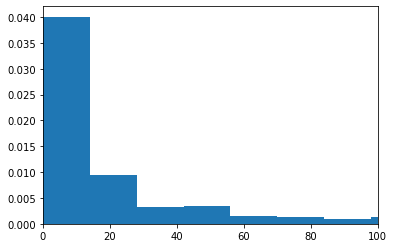

In [250]:
plt.hist(abs(different_sums['Qty Difference']), density = True, bins=1000)
plt.xlim([0, 100])

In [243]:
different_sums['Qty Difference'].mode()

0   -1.00
dtype: float64

# Validating Unique Skus

In [116]:
all_skus = list(dataframe['TXN - Item ID'])

In [117]:
unique_skus_2 = list(set(all_skus))

In [118]:
print(len(unique_skus_2))

45296


In [119]:
# This is a list
unique_skus = dataframe['TXN - Item ID'].unique()

In [120]:
print(unique_skus)
print(len(unique_skus))

['05021408' '02545876' '00250066' ... '896804' 'Q513716201' '03079010']
45296


In [96]:
valid_unique_skus = pandas.read_csv(txn_dirPath + "Valid_unique_skus.csv")

In [97]:
valid_unique_skus

,IOH - Item ID
0,00250052
1,00250053
2,00250056
3,00250113
4,00250118
...,...
52164,42508094
52165,42508095
52166,42508096
52167,42508097


In [102]:
different_skus = list(set(list(valid_unique_skus['IOH - Item ID'])) - set(unique_skus))

In [103]:
print(different_skus)

['02561039', '31052032', '02696747', '02669203', '31479029', '31462026', '5009986', '04467120', '02409873', '02575140', '42440019', '03206863', '06208131', '58179037', '15750021', '02792117', '02606909', '50289934', 'R126919429', 'R12.30.700/680A085', '42694120', '02787035', '04393082', '04360108', 'No Part #', '30910018', '04492094', '02001145', '02606866', '02545864', '02787071', '5010634', '02049031', '02594289', '42035002', '04467125', '580827', '02696782', '04494314', '02579144', '04592210', '02579152', '02614590', '02606359', '31760440', '02592128', '02825003', '31780033', 'R126936299', '42508083', '02796285', '02594140', '42729020', '04293072', '02606883', '04492142', '02594331', '02574718', '04294120', '42552281', '30604030', '500-1689-009', '02674067', '30821002', '02508026', '02101076', '416.04.3804.900', '02569085', '31420012', '02788214', '42590601', '31027060', '02594467', '02612506', '03574262', '31750001', '02933002', 'D30109-01', '02501376', 'D000038701', '02594144', '3

#### The following calculations are correct, but there aren't enough unique SKU's.

In [81]:
dataframe.groupby(['TXN - Item ID'])['TXN - Qty'].sum()

TXN - Item ID
00118002      0.0
00118003     13.0
00118004     10.0
00118005      0.0
00118006     10.0
             ... 
YAV70M10      0.0
YAV70M8       0.0
YAV95M6       0.0
Z53921        0.0
ZX0201015     0.0
Name: TXN - Qty, Length: 45296, dtype: float64

In [83]:
sku_sums = dataframe.groupby(['TXN - Item ID'])['TXN - Qty'].sum()
# This is a dict

In [89]:
sku_sums['00118003']

13.0

In [92]:
print(sku_sums['00250066'])
print(sku_sums['42082077'])
print(sku_sums['00250052'])

2146.0
71.0
2630.0


## Comparing sku_sums to a valid version.

In [144]:
valid_sku_sums_df = pandas.read_csv('Data/Valid_End_Quantities.csv')

In [145]:
valid_sku_sums_df.columns = valid_sku_sums_df.iloc[0] 

valid_sku_sums_df = valid_sku_sums_df[1:]
valid_sku_sums_df["IOH - Qty On Hand"] = pandas.to_numeric(valid_sku_sums_df["IOH - Qty On Hand"])
valid_sku_sums_df.rename(columns={'IOH - Item ID':'TXN - Item ID'}, inplace=True)
valid_sku_sums_df

,TXN - Item ID,IOH - Qty On Hand
1,00250052,150.0
2,00250053,110.0
3,00250056,100.0
4,00250113,0.0
5,00250118,0.0
...,...,...
177873,81018058,0.0
177874,D30109-01,0.0
177875,R2690116,0.0
177876,R2692001,0.0


In [151]:
valid_sku_sums = valid_sku_sums_df.groupby(['TXN - Item ID'])['IOH - Qty On Hand'].sum().to_frame()

In [152]:
valid_sku_sums

,IOH - Qty On Hand
TXN - Item ID,
00118002,0.0
00118003,0.0
00118004,10.0
00118005,0.0
00118006,10.0
...,...
YAV70M10,0.0
YAV70M8,0.0
YAV95M6,0.0


Merge the valid dataframe and the calculated dataframe.

In [158]:
merged_sku_sums = valid_sku_sums.join(other=sku_sums, on='TXN - Item ID')
merged_sku_sums['TXN - Qty'].fillna(0, inplace=True)

Count how many SKU's are incorrect. No magnitude. Also must locate the incorrect ones.

In [159]:
merged_sku_sums['Qty Difference'] = merged_sku_sums['IOH - Qty On Hand'] - merged_sku_sums['TXN - Qty']

In [160]:
merged_sku_sums

,IOH - Qty On Hand,TXN - Qty,Qty Difference
TXN - Item ID,,,
00118002,0.0,0.0,0.0
00118003,0.0,13.0,-13.0
00118004,10.0,10.0,0.0
00118005,0.0,0.0,0.0
00118006,10.0,10.0,0.0
...,...,...,...
YAV70M10,0.0,0.0,0.0
YAV70M8,0.0,0.0,0.0
YAV95M6,0.0,0.0,0.0


In [176]:
validate_skus(dataframe)

0.9880386443796964

In [173]:
print(len(merged_sku_sums.loc[merged_sku_sums['Qty Difference'] != 0]))
print(len(merged_sku_sums))

624
52168


In [174]:
print((52168 - 624) / 52168)

0.9880386443796964
